<a href="https://colab.research.google.com/github/shradhadabhade/AIES/blob/main/Pr6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHAP for Model Interpretation
Train a tree-based model (e.g., RandomForest or XGBoost) on a dataset. Compute SHAP values for one instance and display the top contributing features.


# Telecom Customer Churn Dataset
This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length.

In [ ]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

customer = pd.read_csv("data/customer_churn.csv")
customer.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [ ]:
customer.Churn.value_counts()

0    2655
1     495
Name: Churn, dtype: int64

In [ ]:
X = customer.drop("Churn", axis=1) # Independent variables
y = customer.Churn # Dependent variable

# Training a machine learning model

In [ ]:
# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a machine learning model (example: Random Forest)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       811
           1       0.81      0.82      0.82       134

    accuracy                           0.95       945
   macro avg       0.89      0.90      0.89       945
weighted avg       0.95      0.95      0.95       945



# Explain the model's predictions using SHAP

In [ ]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

# Summarize feature importances

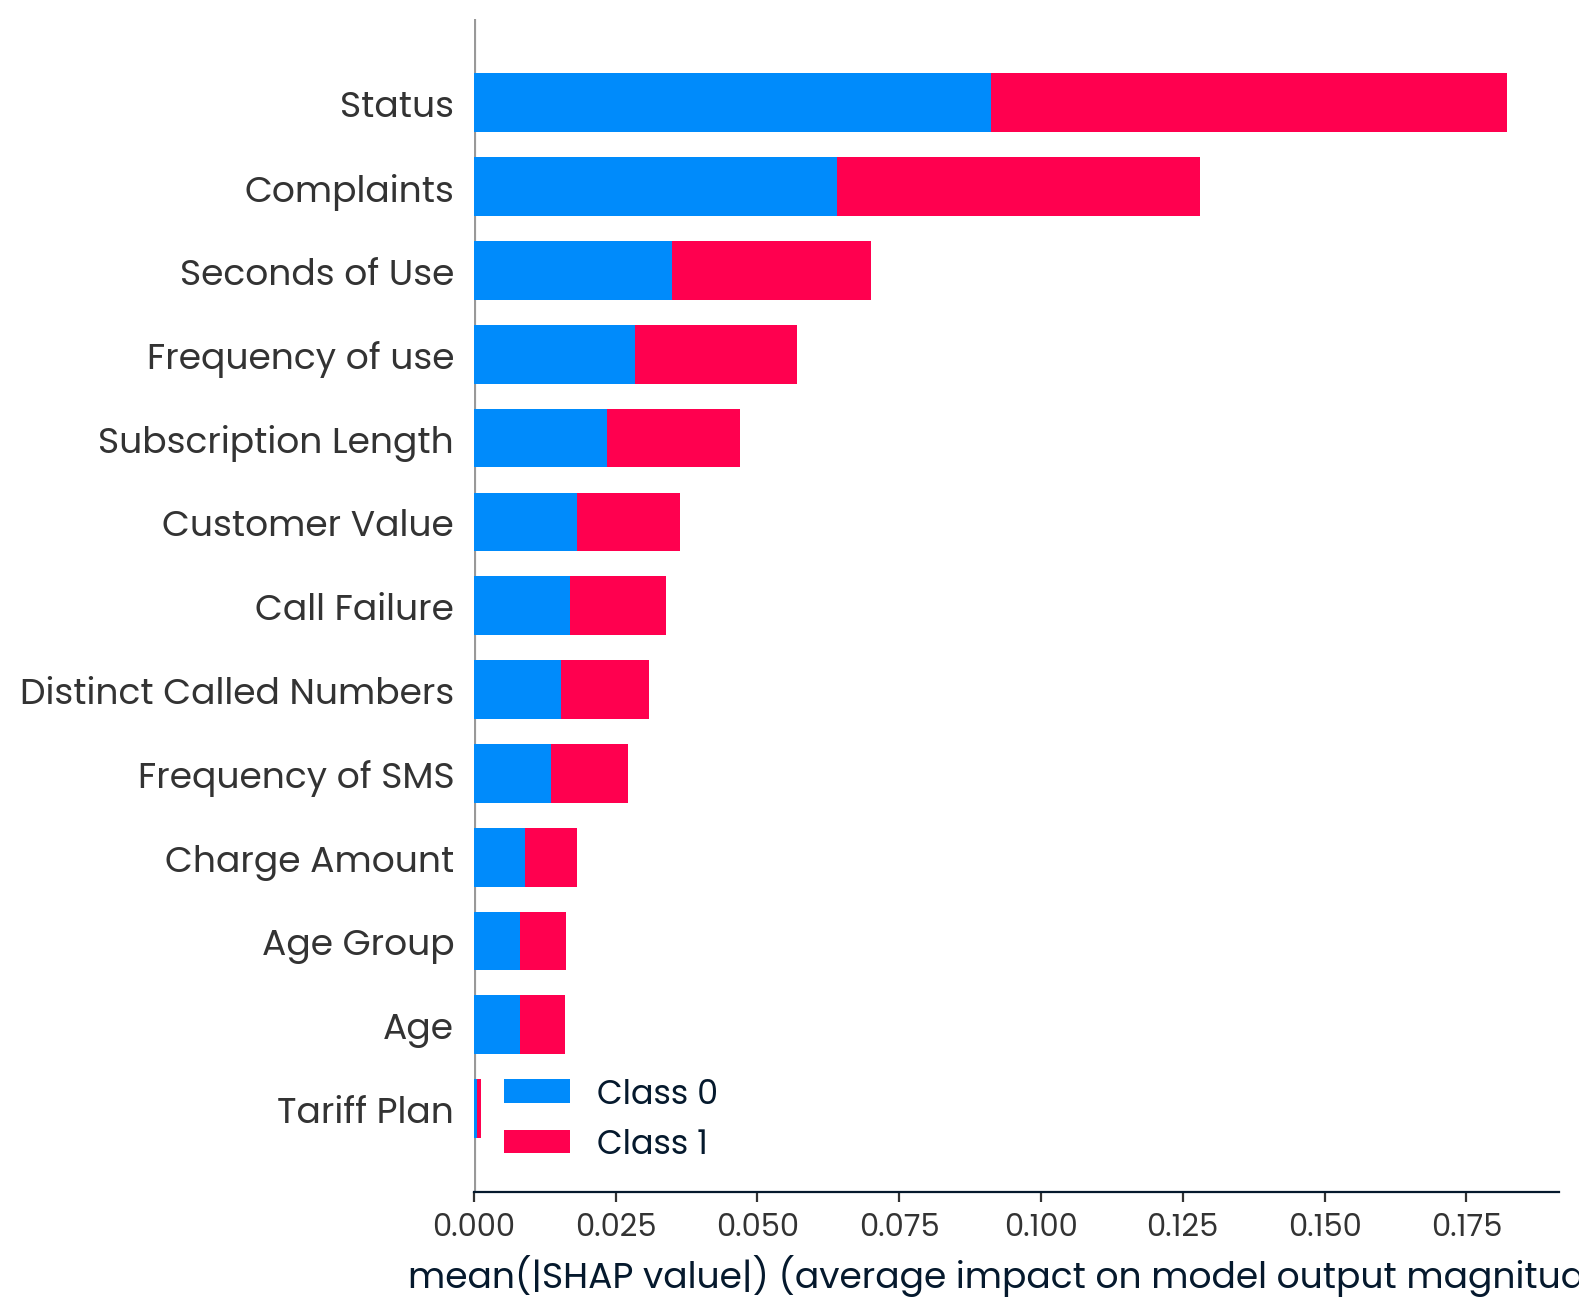

In [ ]:
# Summarize feature importances
shap.summary_plot(shap_values, X_test)

# Feature importances of Label "0"

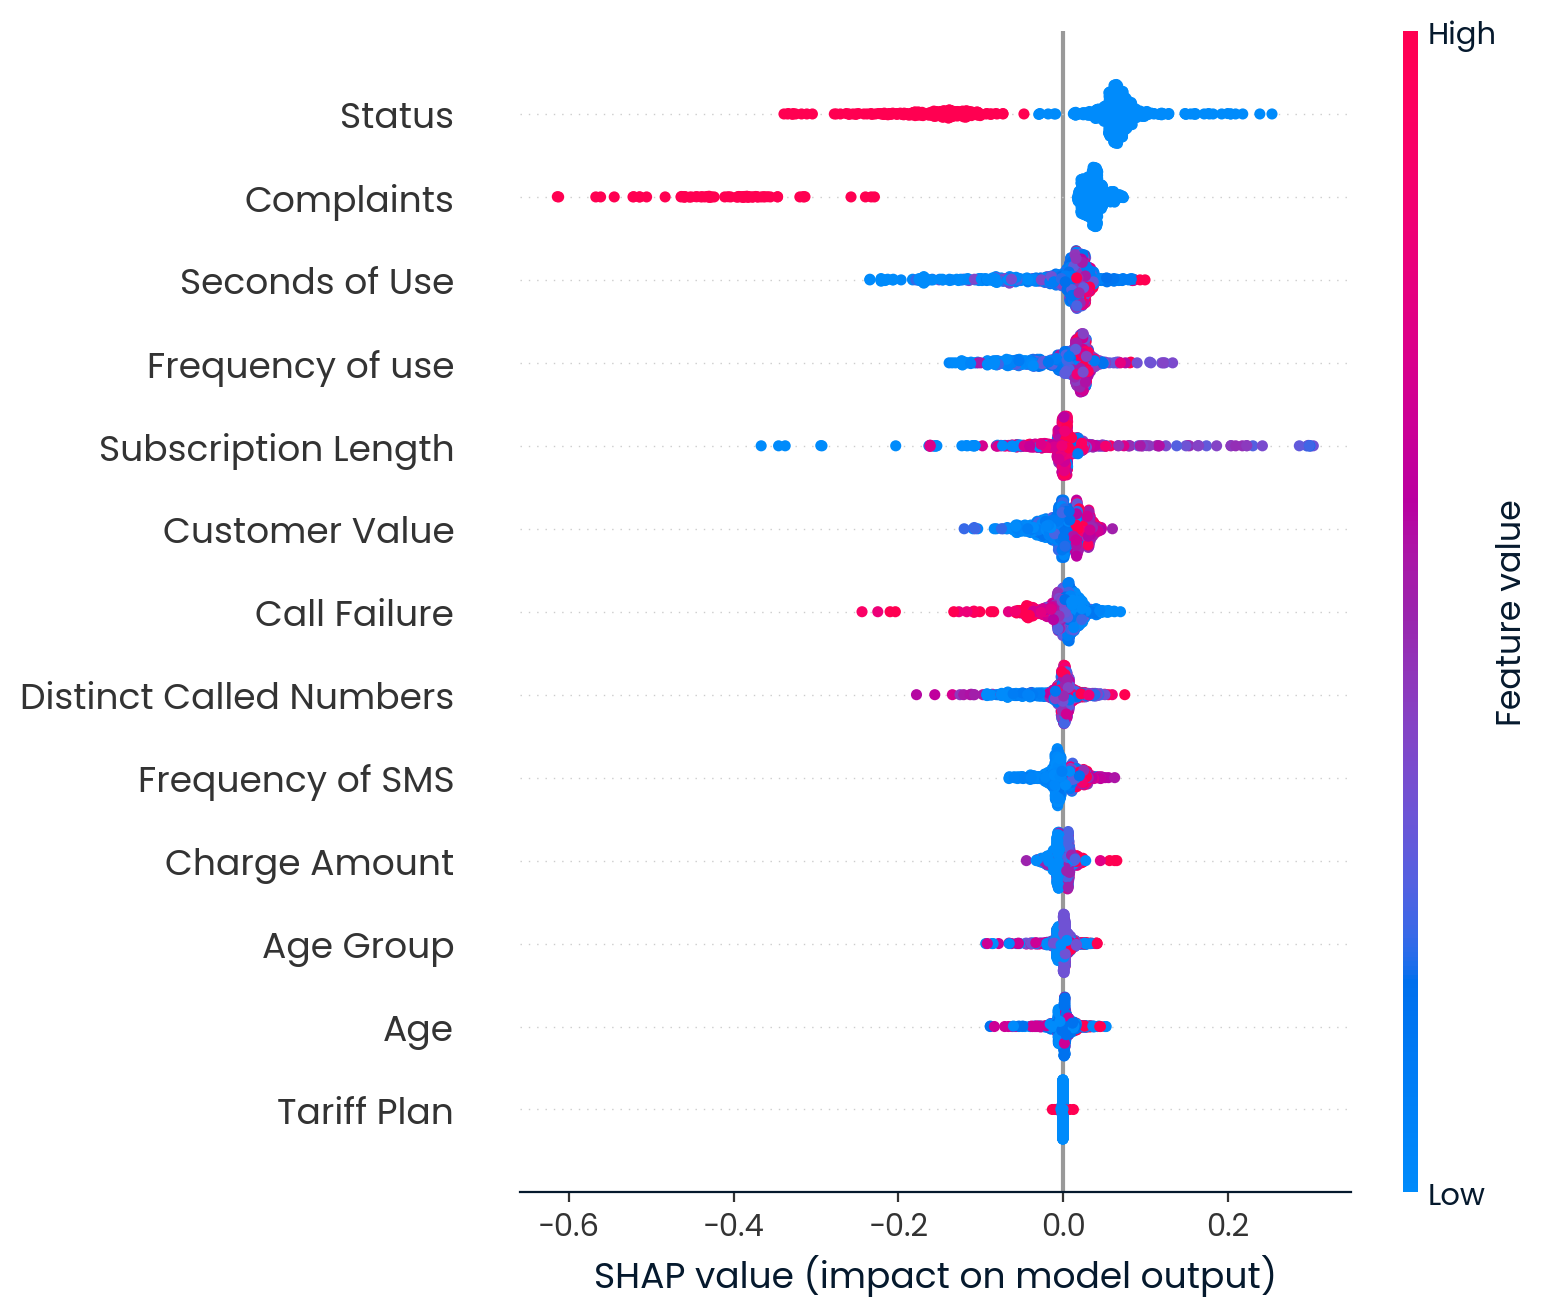

In [ ]:
shap.summary_plot(shap_values[0], X_test)

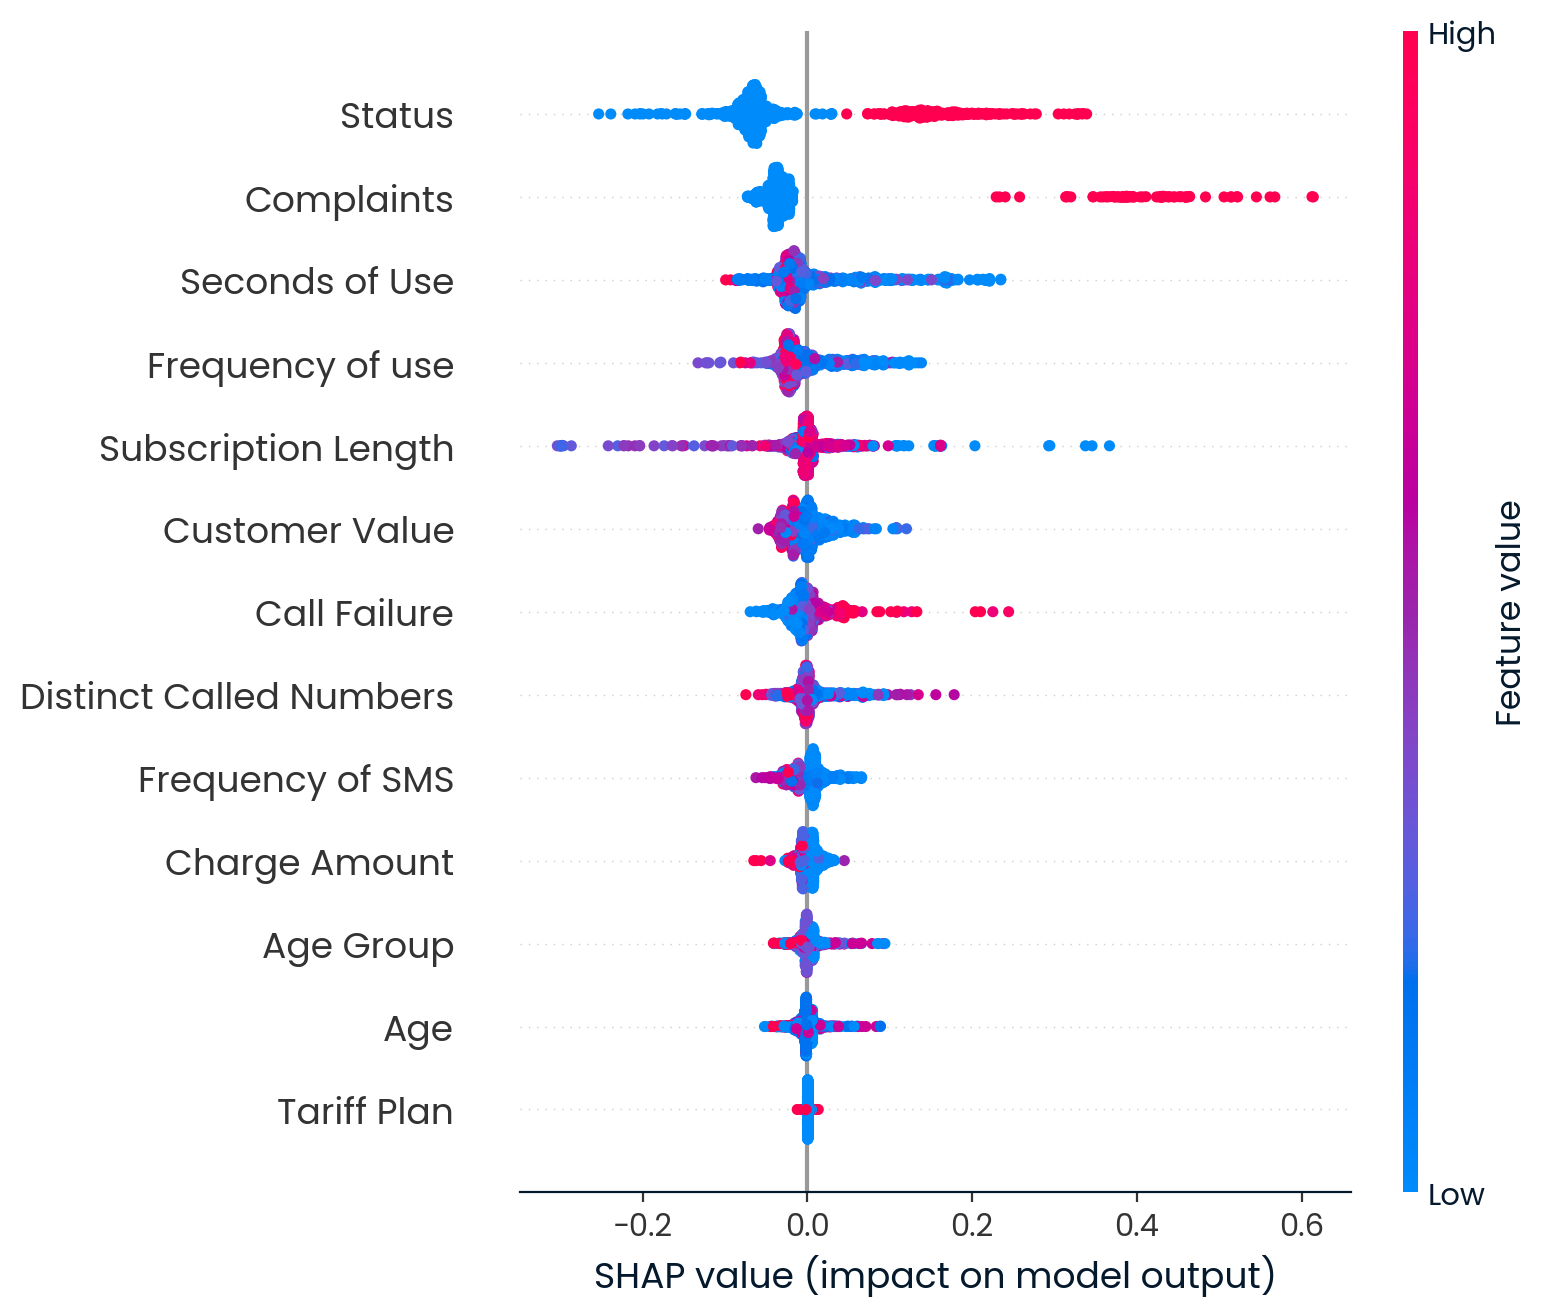

In [ ]:
shap.summary_plot(shap_values[1], X_test)

# Subscription Length vs. Age Dependence Plot

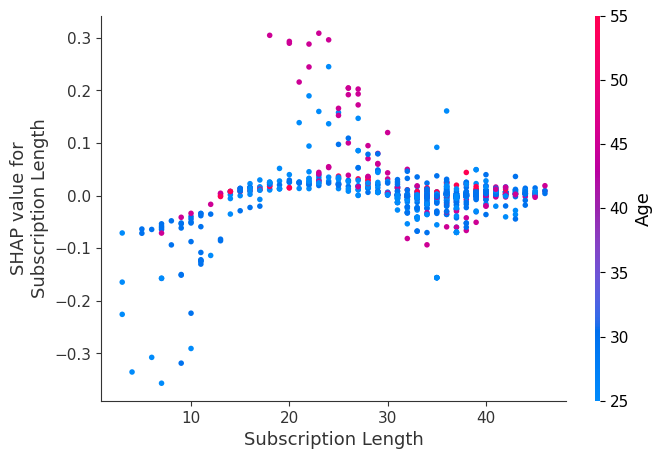

In [ ]:
shap.dependence_plot("Subscription Length", shap_values[0], X_test,interaction_index="Age")

# Force plot of a value of label "0"

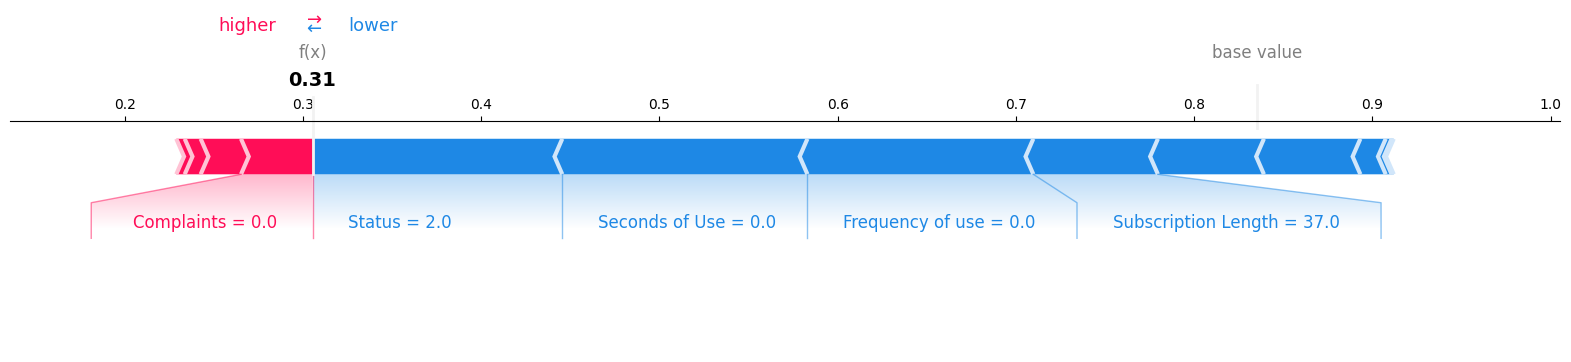

In [ ]:
# Plot SHAP interaction values
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

# Force plot of a value of label "1"

In [ ]:
clf.predict(X_test.iloc[6, :].values.reshape(1, -1))

array([1])

In [ ]:
y_test.iloc[6]

1

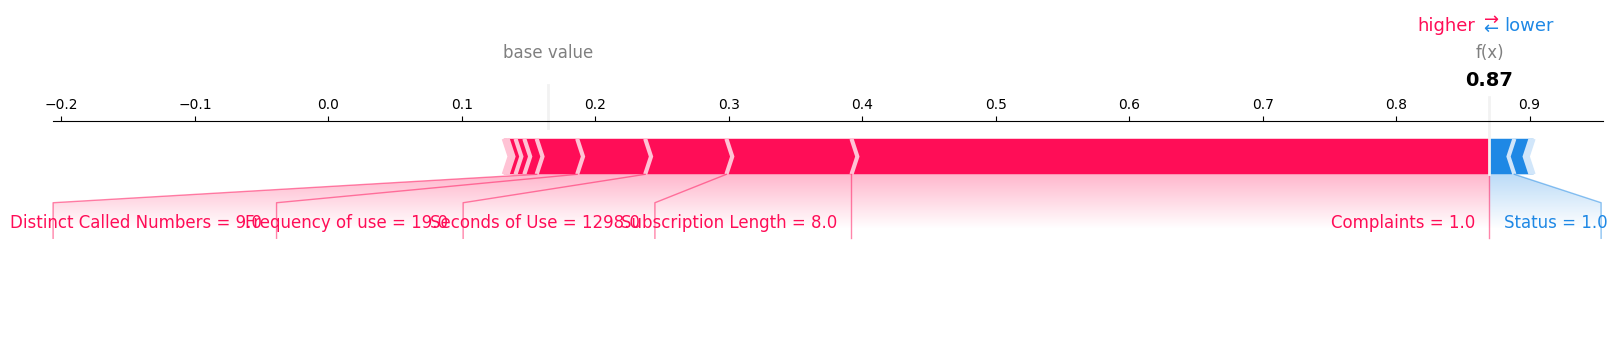

In [ ]:
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)

# Decision Plot of lable "1"

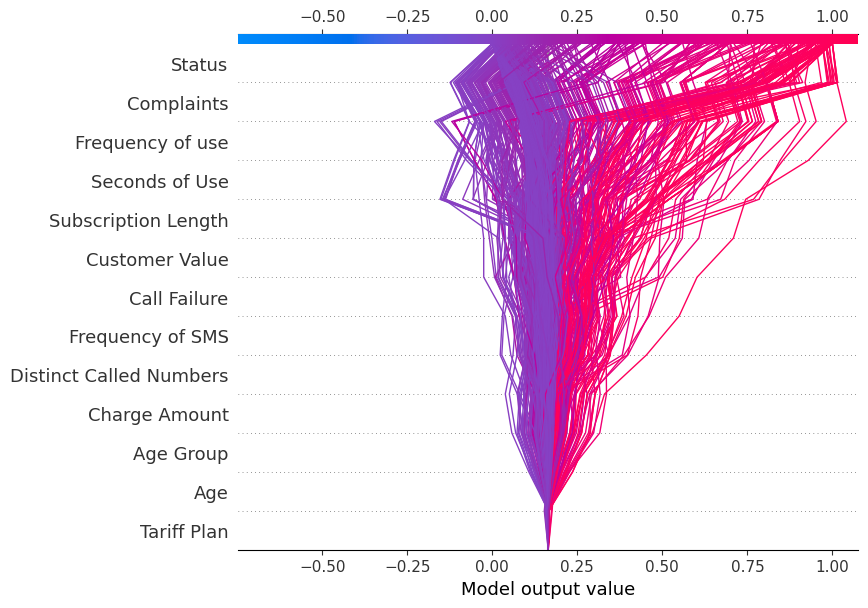

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

# Decision Plot of lable "0"

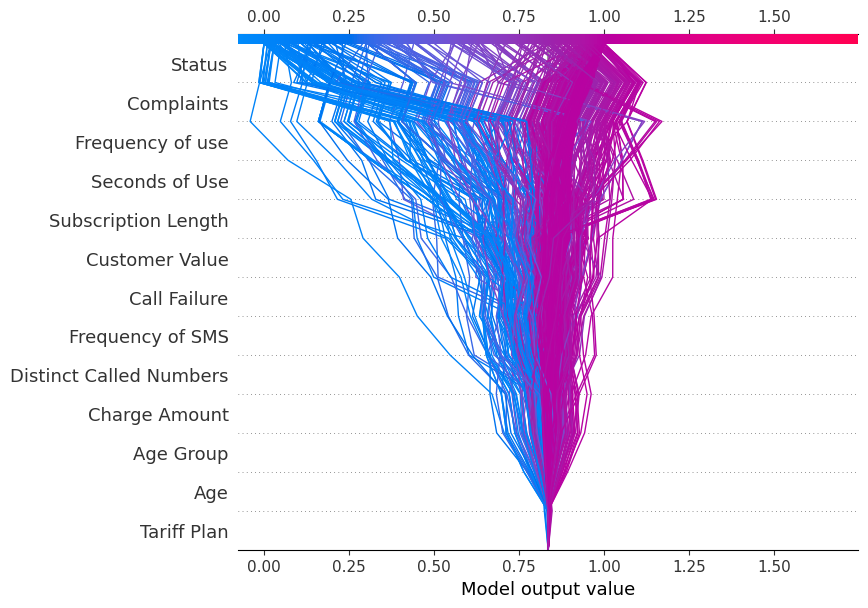

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)